In [150]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf, seasonal_plot, month_plot, quarter_plot
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
import warnings
warnings.filterwarnings(action='ignore')


# Load data and set index and frequenct

In [104]:
df= pd.read_csv(r"C:\Users\MINE\Desktop\time series analysis\Time Series Analysis\CAPSTONE PROJECT - Airmiles\airmiles.csv")

In [105]:
df.head()

,Date,airmiles
0,1/1/1996,30983174
1,1/2/1996,32147663
2,1/3/1996,38342975
3,1/4/1996,35969113
4,1/5/1996,36474391


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      113 non-null    object
 1   airmiles  113 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [ ]:
df.set_index('Date', inplace= True)

In [ ]:
df.index= pd.to_datetime(df.index, dayfirst= True)

# Remenber to put in year month day format

In [ ]:
df= df.asfreq("MS")

# Use ms to indicate month start

In [111]:
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

In [112]:
df.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


# EDA

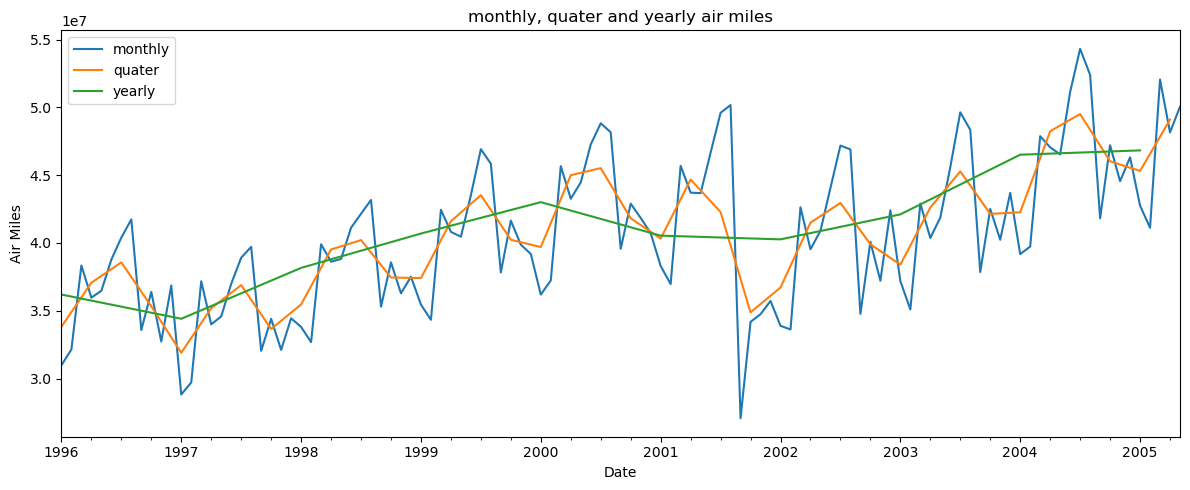

In [126]:

plt.figure(figsize=(12,5))
df.airmiles.resample("ME").mean().plot(label= 'monthly')
df.airmiles.resample("QE").mean().plot(label= 'quater')
df.airmiles.resample("YE").mean().plot(label= 'yearly')

plt.legend()
plt.title('monthly, quater and yearly air miles')
plt.ylabel('Air Miles')
plt.tight_layout()
plt.show()

[]

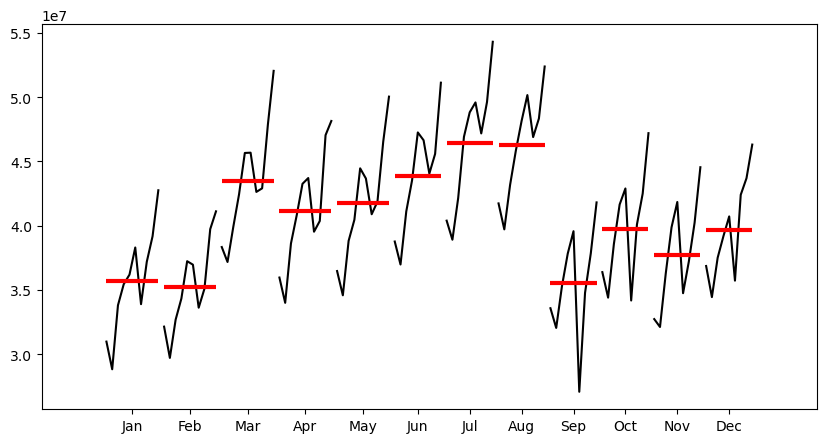

In [131]:
month_plot(df.airmiles.resample("ME").mean()).set_size_inches(10,5)
plt.plot()

# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of Air Miles

[]

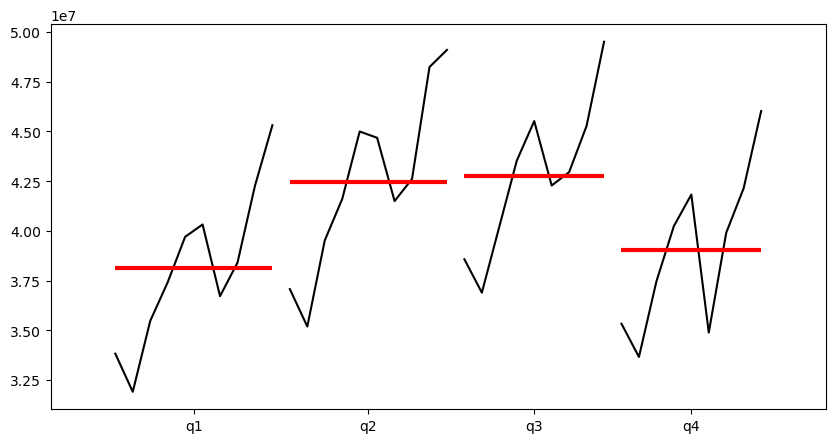

In [132]:
quarter_plot(df.airmiles.resample("QE").mean()).set_size_inches(10,5)
plt.plot()


# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of Air Miles

In [133]:
# Seasonal Decomposition Plots for Bitcoin Data
# Multiplicative model type, with yearly seasonality (12 Months)

decompose= seasonal_decompose(df.airmiles, model='mul', period= 12)

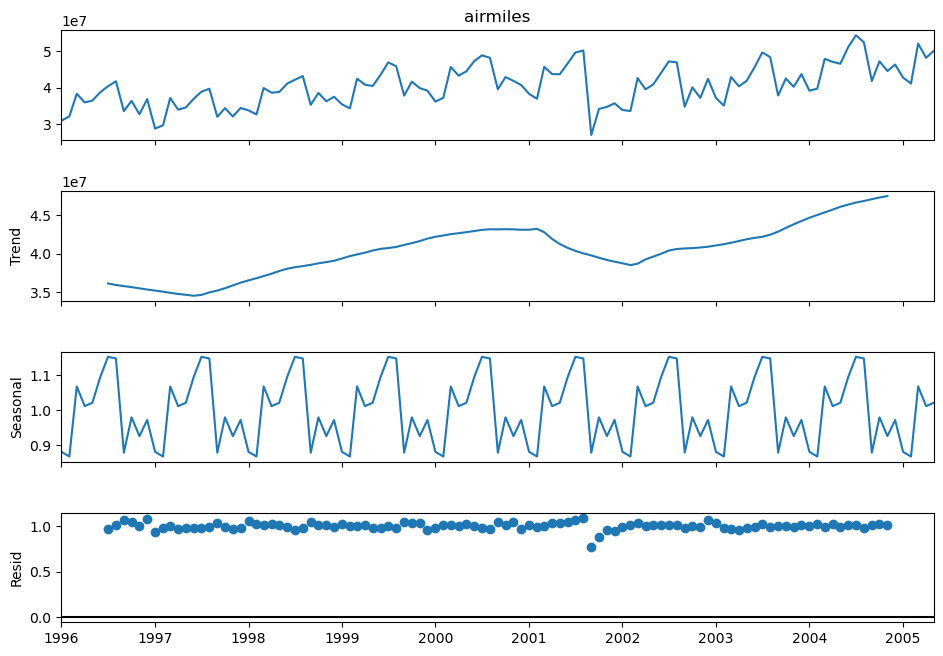

In [136]:
decompose.plot().set_size_inches(10,7)

Autocorrelation measures the correlation between a time series and a lagged version of itself.

Purpose: To identify patterns or repeating cycles in a time series dataset.

Interpretation:
- Values range from -1 to 1.
- 1 indicates perfect positive correlation.
- -1 indicates perfect negative correlation.
- 0 indicates no correlation.

ACF Plot:
- X-axis: Lag periods
- Y-axis: Correlation coefficient

Key Features:
- At lag 0, autocorrelation is always 1 (a series is perfectly correlated with itself).
- Significant spikes at certain lags indicate repeating patterns.


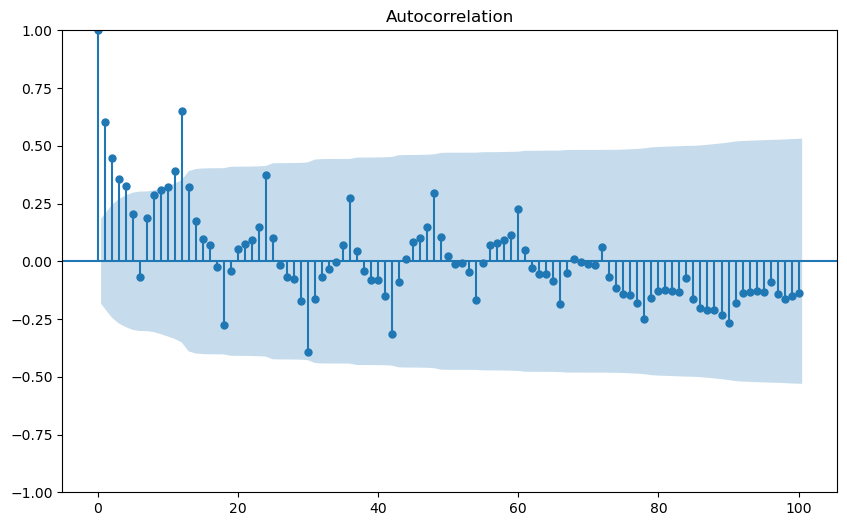

In [140]:
plot_acf(df['airmiles'], lags= 100).set_size_inches(10,6)
plt.show()

PACF measures the correlation between a time series and its lag, after removing the effects of all shorter lags.

Purpose: To identify the direct relationship between an observation and its lag, without intermediate effects.

Main Difference between ACF and PACF:
- ACF: Measures overall correlation at each lag, including indirect effects.
- PACF: Measures direct correlation at each lag, excluding indirect effects.

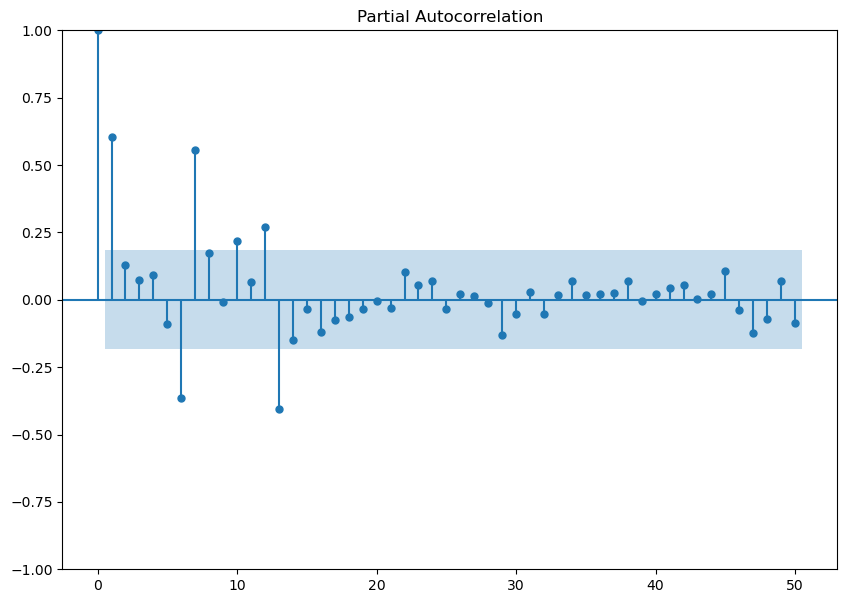

In [143]:
plot_pacf(df['airmiles'], lags=50).set_size_inches(10,7)
plt.show()

# Data Splittiing and model training

In [164]:
train, test= df.iloc[:-12,0], df.iloc[-12:,0]

In [187]:
model= ExponentialSmoothing(train,
                            trend='mul',
                            seasonal='add',
                            seasonal_periods=12).fit()

In [188]:
forecast= model.forecast(len(test))

In [189]:
forecast

2004-06-01    4.950934e+07
2004-07-01    5.173837e+07
2004-08-01    5.132218e+07
2004-09-01    4.081933e+07
2004-10-01    4.591882e+07
2004-11-01    4.414170e+07
2004-12-01    4.612829e+07
2005-01-01    4.238060e+07
2005-02-01    4.202685e+07
2005-03-01    5.012130e+07
2005-04-01    4.797491e+07
2005-05-01    4.842045e+07
Freq: MS, dtype: float64

In [190]:
def measure_performance(train, test, forecast):
    plt.figure(figsize=(10,5))
    plt.plot(train, label='train')
    plt.plot(test, label='test')
    plt.plot(forecast, label='forecast')

    plt.tight_layout()
    plt.legend()
    plt.show()
    print(f'the mean absolute error is {mean_absolute_error(test, forecast)}')
    print(f'the mean percentage absolute error is {100 * (mean_absolute_percentage_error(test, forecast))} % ')
    print(f'the root mean squared error {root_mean_squared_error(test, forecast)}')

    return f'The r2_score is {r2_score(test, forecast)}'
  

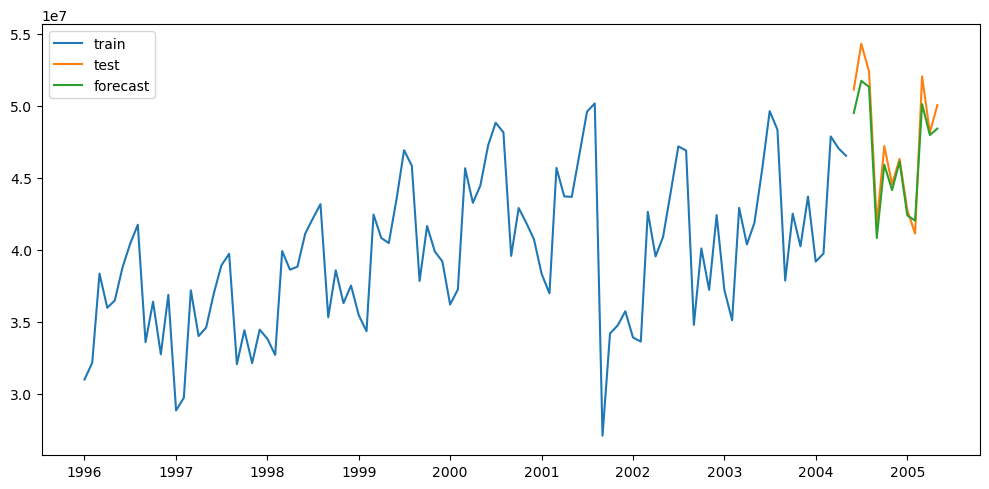

the mean absolute error is 1098498.1930884302
the mean percentage absolute error is 2.236300227463613 % 
the root mean squared error 1312454.7091735052


'The r2_score is 0.9045692165455578'

In [191]:
measure_performance(train, test, forecast)

# Forecasting the future

In [216]:
future_model=  ExponentialSmoothing(df['airmiles'],
                                    trend='mul',
                                    seasonal='add',
                                    seasonal_periods=12).fit()

In [217]:
forecast= future_model.forecast(12)

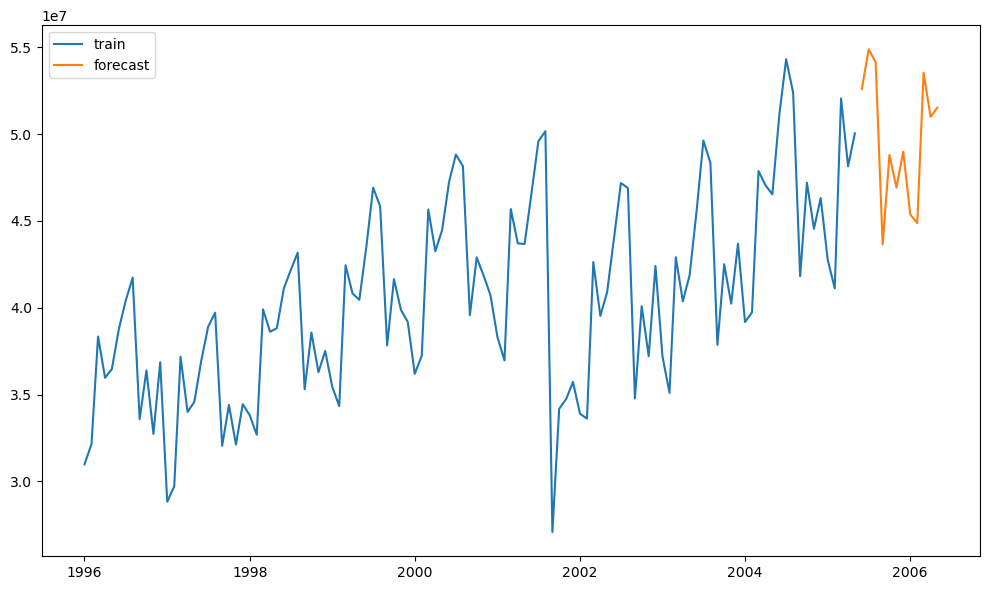

In [222]:
plt.figure(figsize=(10,6))
plt.plot(df['airmiles'], label= 'train')
plt.plot(forecast, label= 'forecast')

plt.tight_layout()
plt.legend()
plt.show()